# Data Mining the Water Table in Tanzania

The goal is to predict the operating condition of a waterpoint for each record in the dataset.

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read and clean the train dataset and the water train labels dataset. The dataset is joined by semicolon, so I have to use delimiter/split to seperate the semicolons 

In [77]:
water_train = pd.read_csv("water_train.csv", delimiter=";")

In [78]:
water_train_label = pd.read_csv("water_train_labels.csv", delimiter=";")

## Data Exploration

In [79]:
df = water_train.merge(water_train_label, on = "id", how = "left")
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,454,50.0,2013-02-27,Dmdd,2092,DMDD,35.426020,-4.227446,Narmo,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,510,0.0,2011-03-17,Cmsr,0,Gove,35.510074,-5.724555,Lukali,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
2,14146,0.0,2011-07-10,Kkkt,0,KKKT,32.499866,-9.081222,Mahakama,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
3,47410,0.0,2011-04-12,NaN,0,NaN,34.060484,-8.830208,Shule Ya Msingi Chosi A,0,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,non functional
4,1288,300.0,2011-04-05,Ki,1023,Ki,37.032690,-6.040787,Kwa Mjowe,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,other,other,non functional


In [80]:
df.shape

(47520, 41)

In [81]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,47520.000000,47520.000000,47520.000000,47520.000000,4.752000e+04,47520.000000,47520.000000,47520.000000,47520.000000,47520.000000
mean,37114.486406,322.047573,668.745370,34.091316,-5.705002e+00,0.504566,15.326515,5.639310,179.528283,1303.353199
std,21445.765406,3200.623244,692.972153,6.538403,2.943503e+00,13.253850,17.618798,9.661285,472.772997,950.763878
min,0.000000,0.000000,-63.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18555.750000,0.000000,0.000000,33.084320,-8.532465e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37038.000000,0.000000,370.000000,34.911677,-5.017697e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55666.250000,20.000000,1320.000000,37.180585,-3.326464e+00,0.000000,17.000000,5.000000,213.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47520 entries, 0 to 47519
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     47520 non-null  int64  
 1   amount_tsh             47520 non-null  float64
 2   date_recorded          47520 non-null  object 
 3   funder                 44643 non-null  object 
 4   gps_height             47520 non-null  int64  
 5   installer              44631 non-null  object 
 6   longitude              47520 non-null  float64
 7   latitude               47520 non-null  float64
 8   wpt_name               47519 non-null  object 
 9   num_private            47520 non-null  int64  
 10  basin                  47520 non-null  object 
 11  subvillage             47224 non-null  object 
 12  region                 47520 non-null  object 
 13  region_code            47520 non-null  int64  
 14  district_code          47520 non-null  int64  
 15  lg

In [83]:
categorical_features = df.select_dtypes(include="object").drop(columns = ["date_recorded"])
categorical_features.head()

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,Dmdd,DMDD,Narmo,Internal,Bashnet Kati,Manyara,Babati,Bashinet,True,GeoData Consultants Ltd,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,Cmsr,Gove,Lukali,Internal,Lukali,Dodoma,Bahi,Lamaiti,True,GeoData Consultants Ltd,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
2,Kkkt,KKKT,Mahakama,Lake Rukwa,Chawalikozi,Mbeya,Mbozi,Ndalambo,True,GeoData Consultants Ltd,...,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
3,NaN,NaN,Shule Ya Msingi Chosi A,Rufiji,Shuleni,Mbeya,Mbarali,Chimala,True,GeoData Consultants Ltd,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,non functional
4,Ki,Ki,Kwa Mjowe,Wami / Ruvu,Ngholong,Morogoro,Kilosa,Chakwale,True,GeoData Consultants Ltd,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,other,other,non functional


In [84]:
for col in categorical_features:
    print(f"Missing valus of {col}: ", categorical_features[col].isnull().sum())
    print(f"Unique values of {col}: ", len(categorical_features[col].unique()))

Missing valus of funder:  2877
Unique values of funder:  1698
Missing valus of installer:  2889
Unique values of installer:  1924
Missing valus of wpt_name:  1
Unique values of wpt_name:  30742
Missing valus of basin:  0
Unique values of basin:  9
Missing valus of subvillage:  296
Unique values of subvillage:  17233
Missing valus of region:  0
Unique values of region:  21
Missing valus of lga:  0
Unique values of lga:  125
Missing valus of ward:  0
Unique values of ward:  2076
Missing valus of public_meeting:  2689
Unique values of public_meeting:  3
Missing valus of recorded_by:  0
Unique values of recorded_by:  1
Missing valus of scheme_management:  3103
Unique values of scheme_management:  12
Missing valus of scheme_name:  23036
Unique values of scheme_name:  2541
Missing valus of permit:  2439
Unique values of permit:  3
Missing valus of extraction_type:  0
Unique values of extraction_type:  18
Missing valus of extraction_type_group:  0
Unique values of extraction_type_group:  13
M

### funder is missing 2877 values, installer 2889 values, wpt_name 1 value, subvillage 296 values, public_meeting 2689, scheme_management  3103, scheme_name:  23036, permit:  2439. 
###  I will impute most of these features with the mean/most frequent value and maybe drop some like, wpt_name since this does not have much relevance on the functionality of a waterpomp.

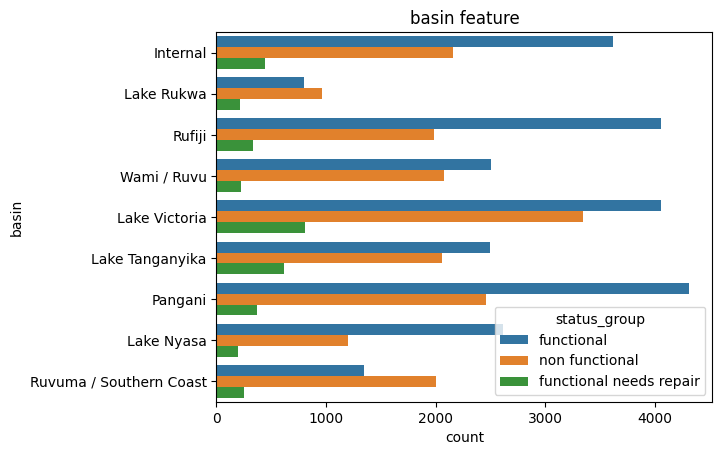

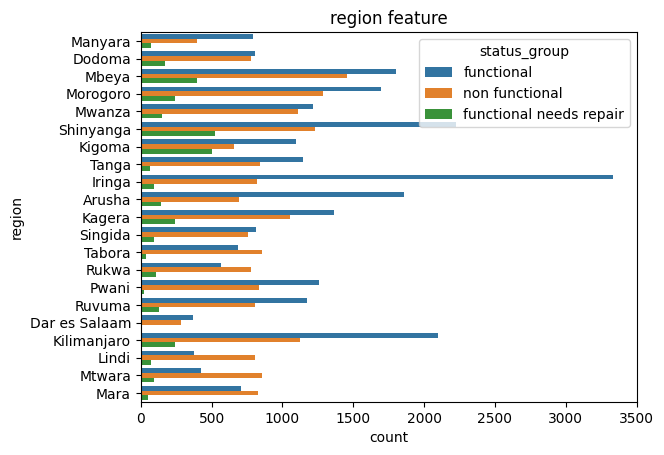

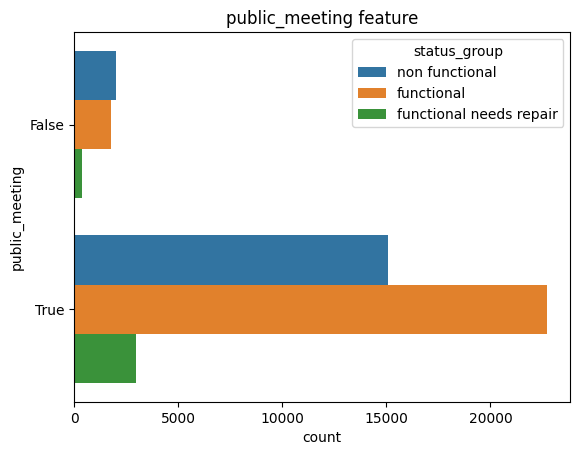

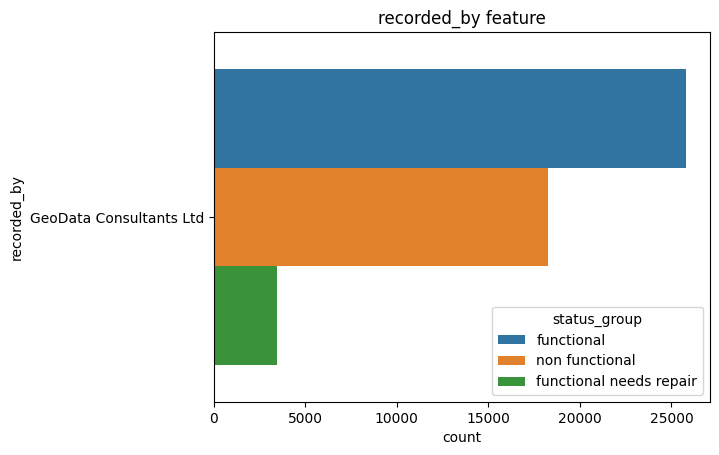

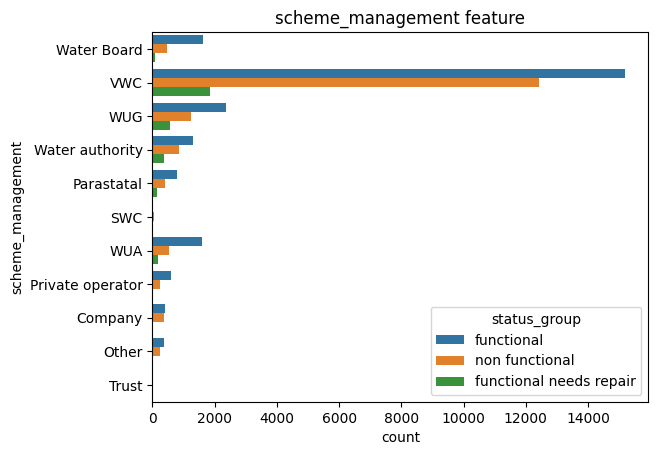

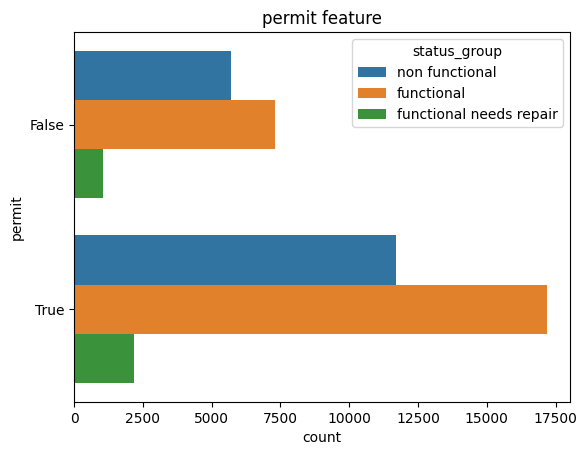

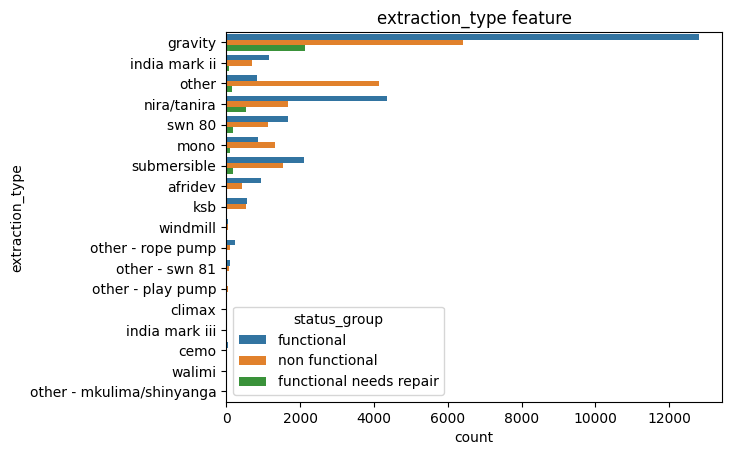

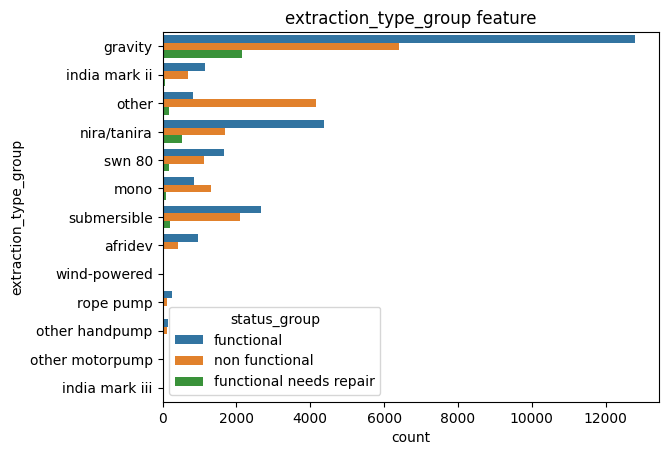

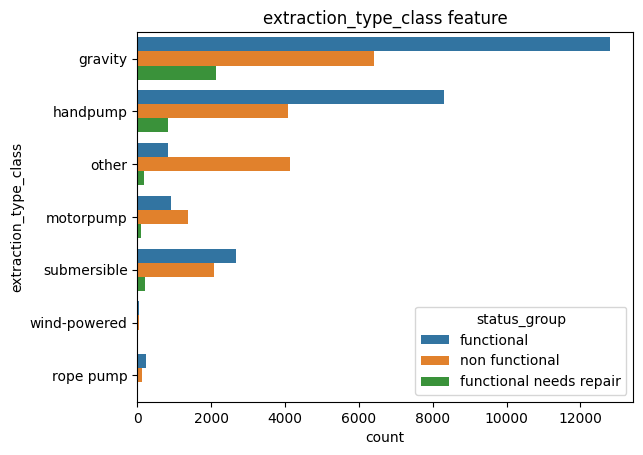

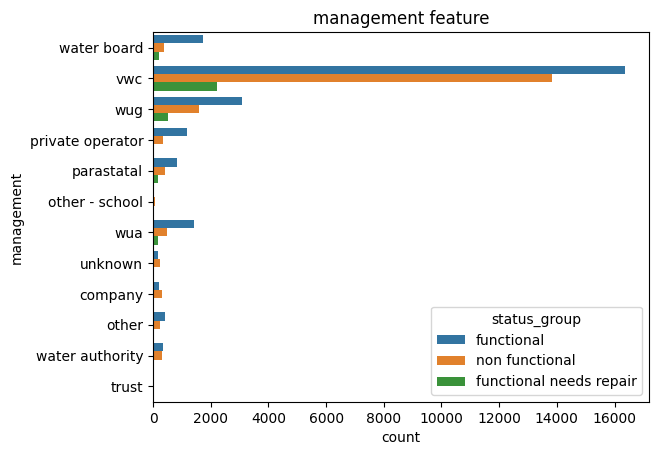

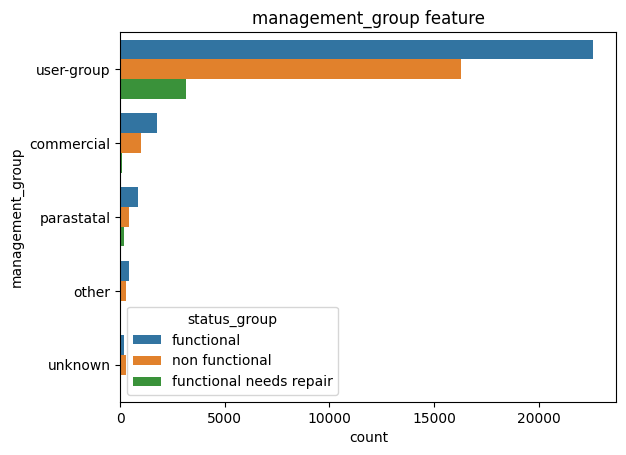

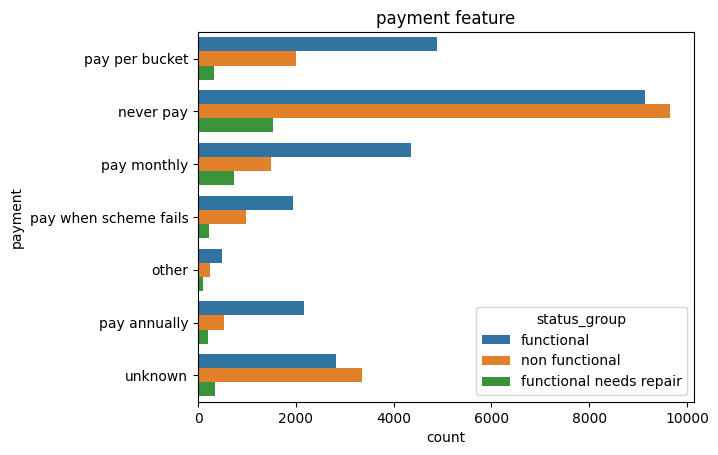

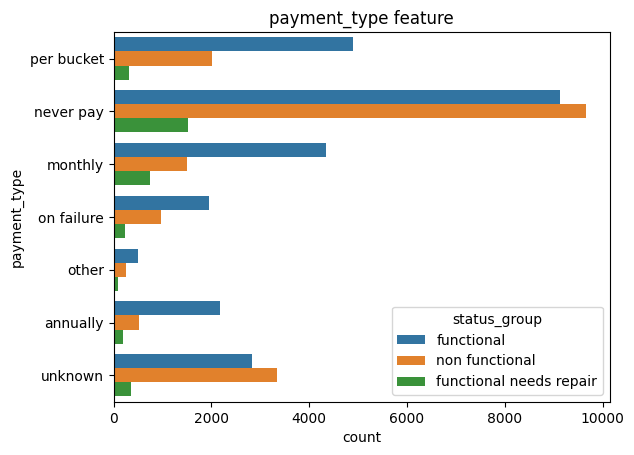

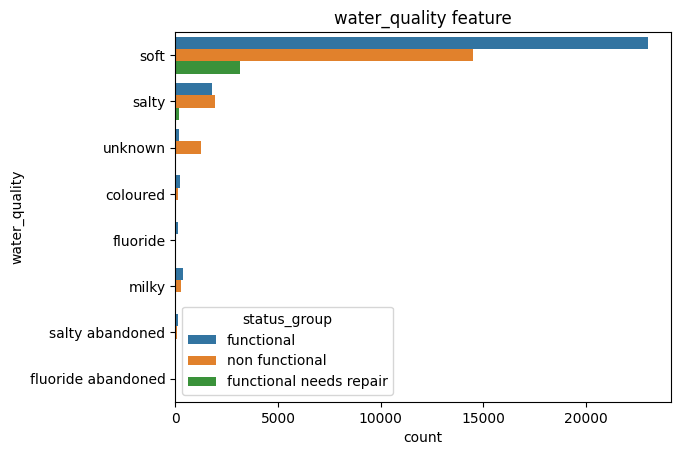

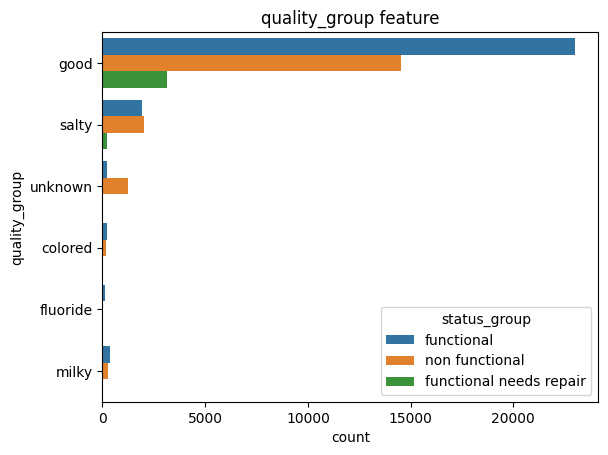

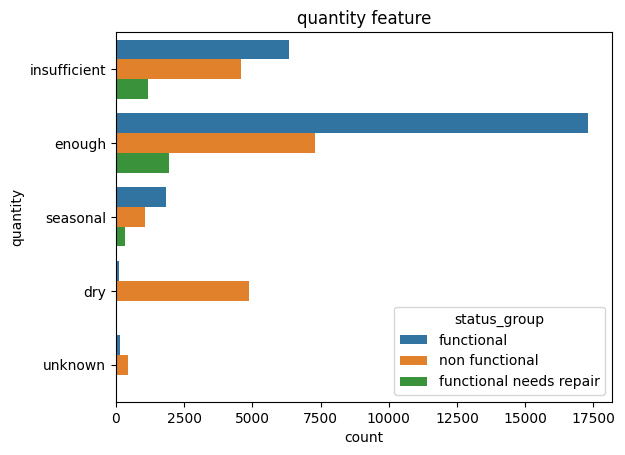

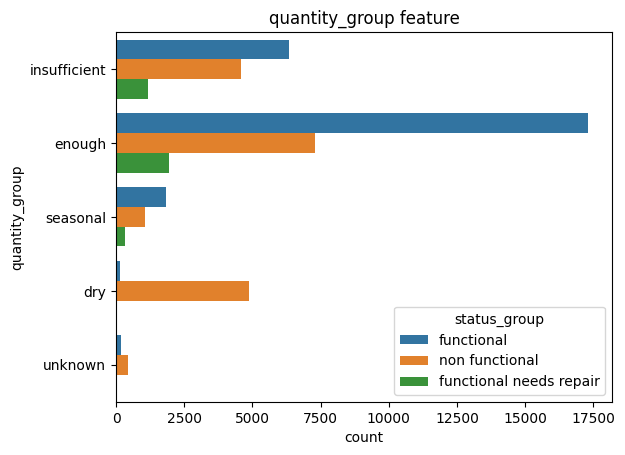

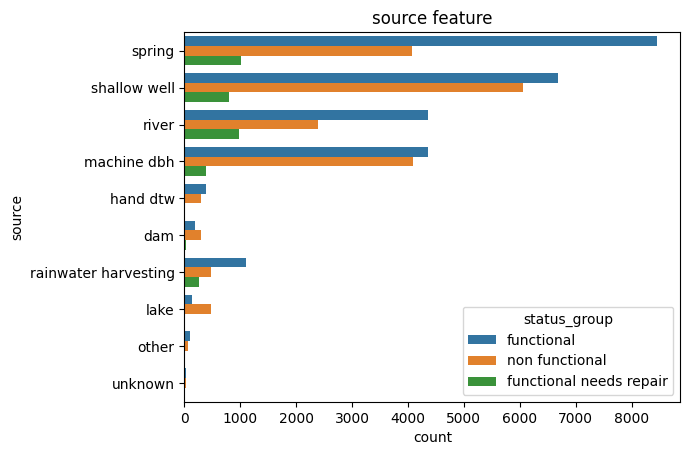

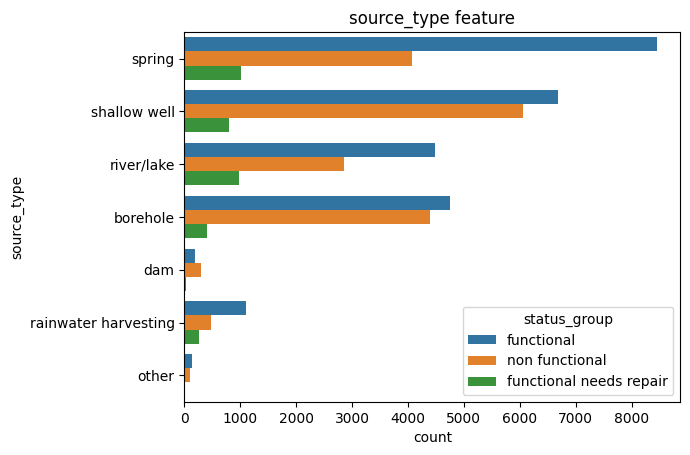

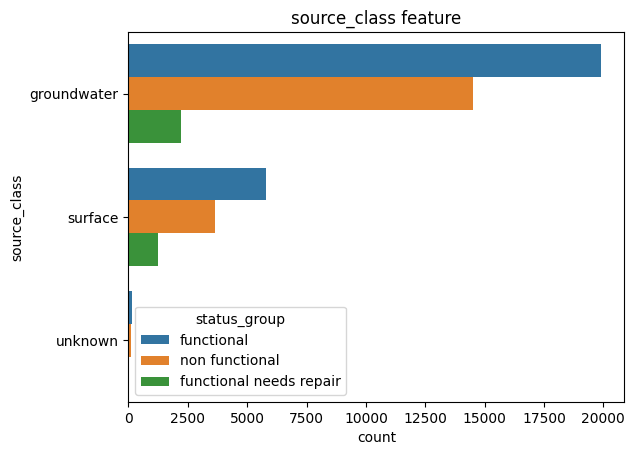

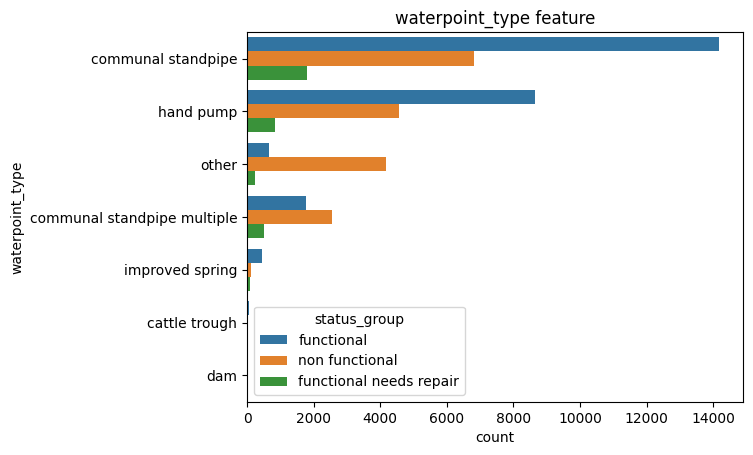

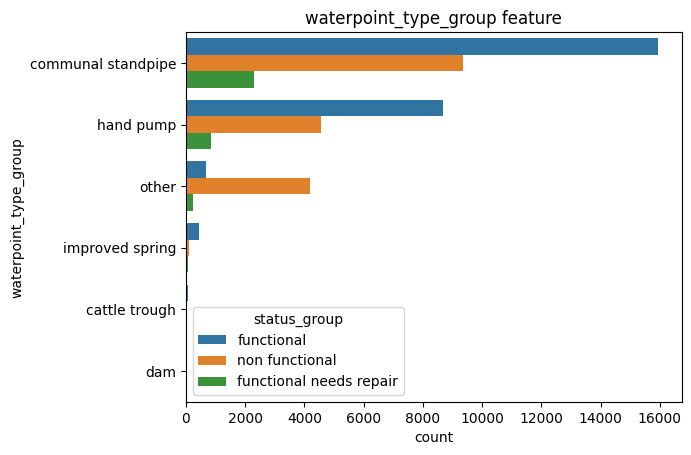

In [85]:
categorical = categorical_features.drop(columns = ["funder", "installer", "wpt_name", "subvillage", "lga", "ward", "scheme_name",
                                               "status_group"])
col_names = categorical.columns

for name in col_names:
    sns.countplot(data = df, y = name, hue = "status_group")
    plt.title(name + " feature")
    plt.show()

Some categorical features like, waterpoint_type_group, waterpoint_type and source source_type, quantity, quantity_group are explaining more or less the same variance, so I will pick only one of these features to enhance computation since I still have to one hot encode these categorical features.

In [86]:
numerical_features = df.select_dtypes(include="number").drop(columns = ["id", "construction_year"])
numerical_features.head()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population
0,50.0,2092,35.426020,-4.227446,0,21,1,160
1,0.0,0,35.510074,-5.724555,0,1,6,0
2,0.0,0,32.499866,-9.081222,0,12,6,0
3,0.0,0,34.060484,-8.830208,0,12,7,0
4,300.0,1023,37.032690,-6.040787,0,5,1,120


In [87]:
for col in numerical_features:
    print(f"Missing valus of {col}: ", numerical_features[col].isna().sum())
    print(f"Unique values of {col}: ", len(numerical_features[col].unique()))

Missing valus of amount_tsh:  0
Unique values of amount_tsh:  96
Missing valus of gps_height:  0
Unique values of gps_height:  2401
Missing valus of longitude:  0
Unique values of longitude:  46043
Missing valus of latitude:  0
Unique values of latitude:  46044
Missing valus of num_private:  0
Unique values of num_private:  59
Missing valus of region_code:  0
Unique values of region_code:  27
Missing valus of district_code:  0
Unique values of district_code:  20
Missing valus of population:  0
Unique values of population:  971


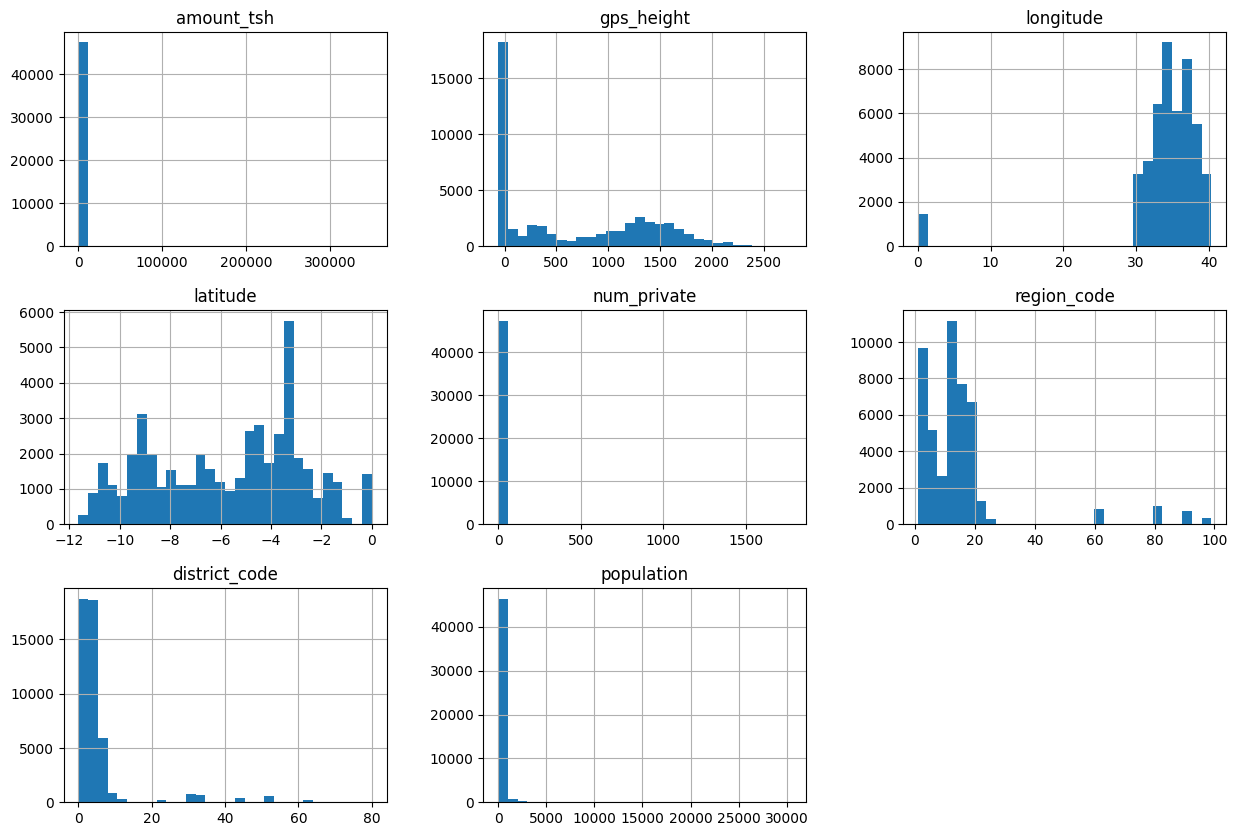

In [88]:
numerical_features.hist(bins = 30, figsize = (15, 10))
plt.show()

In [89]:
count = sum(1 for value in numerical_features["population"] if value == 0)
count

17048

In [90]:
num = sum(1 for value in numerical_features["num_private"] if value == 0)
num

46903

In [91]:
height = sum(1 for value in numerical_features["gps_height"] if value == 0)
print("zeros: ", height)

zeros:  16275


In [92]:
amount = sum(1 for value in numerical_features["amount_tsh"] if value == 0)
amount

33331

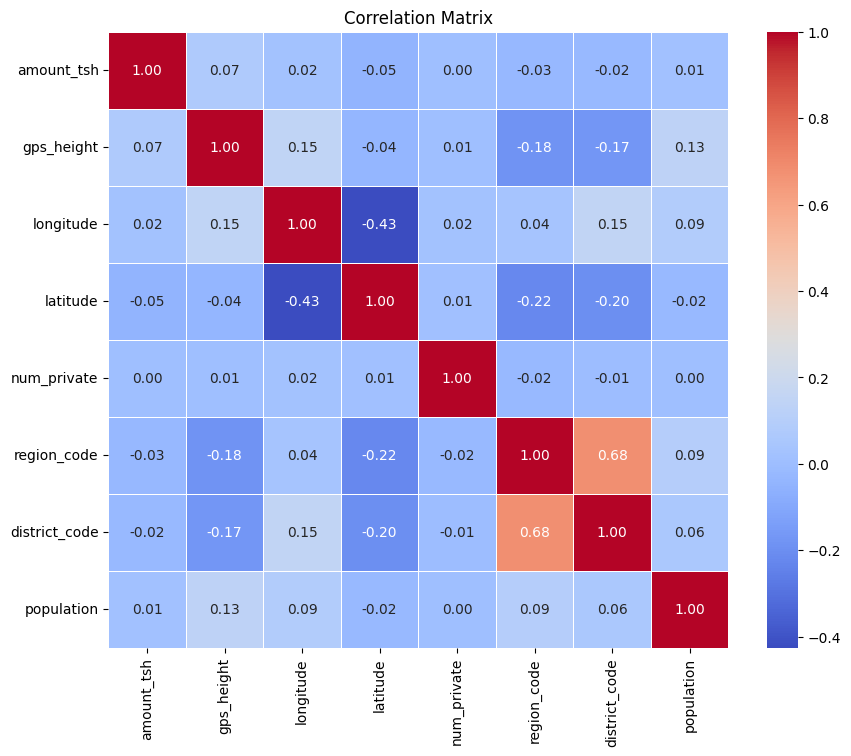

In [93]:
corr = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot = True, cmap = "coolwarm", fmt = ".2f", linewidth = 0.5)
plt.title("Correlation Matrix")
plt.show()

### No missing values for numerical features! However, these feature have a lot of 0 values. Zeros in population might indicate that some pomps have no people living around well/waterpomp but why will a waterpomp be constructed in an unhabited area? or these zeros indicate missing data in which case I will have to impute.
### amount_tst 0's indicate no water available to some waterpoints(pomp). 
### gps_height indicate the altitude of the well however, the spike in zeros from the histogram indicate missing values. 
### num_private feature does not explain much variance with a low correlation with other features, and have a spike in zeros from the histogram indicating missing values.  might have to drop this feature. 

### Longitude and latitude features have a low correlation with other continous variables, will varify the performce with the model and decide what to do with these features!


In [94]:
df["construction_year"] = pd.to_datetime(df["construction_year"])
df["construction_year"] = df["construction_year"].dt.year

In [95]:
df["date_recorded"] = pd.to_datetime(df["date_recorded"])
date_features = df[["date_recorded", "construction_year"]]

df["year_recorded"] = df["date_recorded"].dt.year
df["month_recorded"] = df["date_recorded"].dt.month
df["day_recorded"] = df["date_recorded"].dt.day


In [96]:
for col in date_features:
    print(f"Missing valus of {col}: ", date_features[col].isna().sum())
    print(f"Unique values of {col}: ", len(date_features[col].unique()))

Missing valus of date_recorded:  0
Unique values of date_recorded:  351
Missing valus of construction_year:  0
Unique values of construction_year:  1


construction_year feature only has value, 1970. Might have to drop this feature since it doesn't account for much variance.

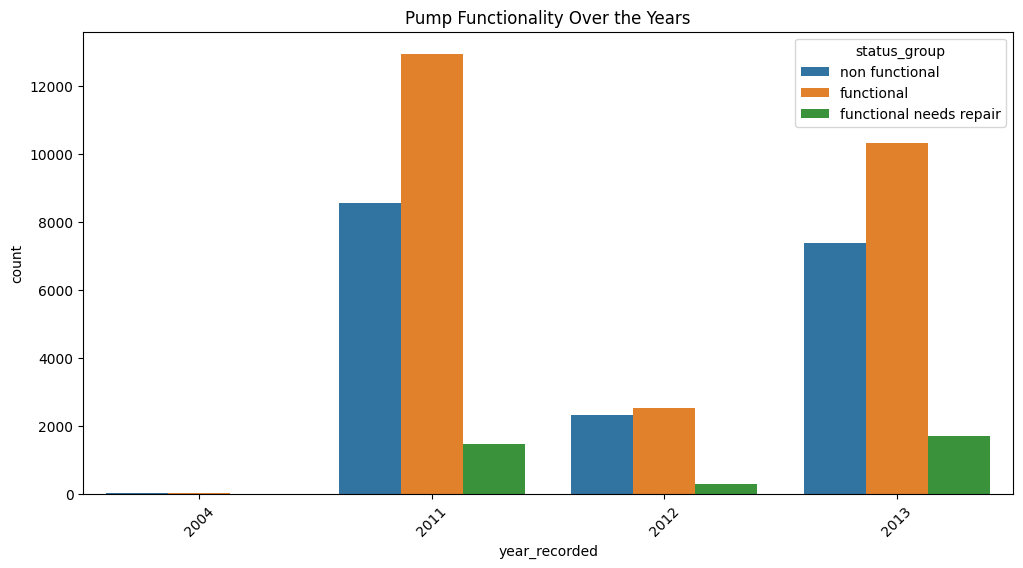

In [97]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="year_recorded", hue="status_group")
plt.title("Pump Functionality Over the Years")
plt.xticks(rotation=45)
plt.show()

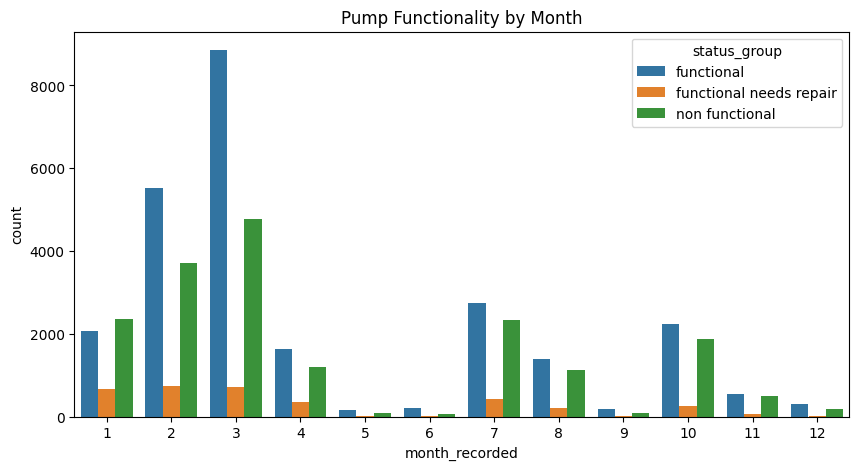

In [98]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="month_recorded", hue="status_group")
plt.title("Pump Functionality by Month")
plt.show()

## Feature Engineering and Pipeline!

In [99]:
numerical_cols = ["amount_tsh", "gps_height", "population", "longitude", "latitude", "region_code", "district_code"]

categorical_cols = ["funder", "installer", "waterpoint_type", "source_type", "source", "scheme_management",
                    "management_group", "basin", "quantity_group", "water_quality", "payment_type", "extraction_type_class"]

boolean_cols = ["public_meeting", "permit"]

date_col = ["date_recorded", "construction_year"]

In [100]:
from sklearn.preprocessing import FunctionTransformer

def zero_imputer(X):
    """Replaces zero values in gps_height with the median of the respective region_code."""
    X = X.copy()
    
    # Ensure 'region_code' is numeric
    X["region_code"] = pd.to_numeric(X["region_code"], errors="coerce")
    
    # Compute the median gps_height for each region_code
    median_by_region = X.groupby("region_code")["gps_height"].median().to_dict()
    
    # Add indicator column
    X["is_gps_height_zero"] = (X["gps_height"] == 0).astype(int)
    
    # Replace zero values in 'gps_height' using the median of the region
    X["gps_height"] = X.apply(
        lambda row: median_by_region.get(row["region_code"], row["gps_height"]) 
        if row["gps_height"] == 0 else row["gps_height"], axis=1
    )
    
    return X

zero_imputer_transformer = FunctionTransformer(zero_imputer)

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [102]:
categorical_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("scaler", OneHotEncoder(handle_unknown = "ignore"))
])

In [103]:
numerical_transformer = Pipeline(steps=[
    ("zero_imputer", zero_imputer_transformer), 
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

In [104]:
boolean_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("to_int", OneHotEncoder(drop="if_binary", dtype=int))
])

In [105]:
def transform_dates(X):
    """Transforms date-related features and computes pump age."""
    X = X.copy()

    X["date_recorded"] = pd.to_datetime(X["date_recorded"], errors="coerce")
    X["construction_year"] = pd.to_numeric(X["construction_year"], errors="coerce")

   
    X["year_recorded"] = X["date_recorded"].dt.year
    X["month_recorded"] = X["date_recorded"].dt.month
    X["day_recorded"] = X["date_recorded"].dt.day
    X["day_of_week"] = X["date_recorded"].dt.dayofweek 
    X["week_of_year"] = X["date_recorded"].dt.isocalendar().week

    # Compute age of the pump
    X["age_at_record"] = X["year_recorded"] - X["construction_year"]
    X["age_at_record"] = X["age_at_record"].clip(lower=0)

  
    X = X.drop(columns=["date_recorded"], errors="ignore")  

    return X

date_transformer = FunctionTransformer(transform_dates)

In [106]:
date_transformer = Pipeline(steps=[
    ("date_transformer", date_transformer), 
    ("imputer", SimpleImputer(strategy="median")), 
    ("scaler", StandardScaler()) 
])

In [107]:
df_numerical = numerical_transformer.fit_transform(df[numerical_cols])

In [108]:
df_categorical = categorical_transformer.fit_transform(df[categorical_cols])

In [109]:
df_bool = boolean_transformer.fit_transform(df[boolean_cols])

In [110]:
df_date = date_transformer.fit_transform(df[date_col])

In [111]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers = [
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols),
        ("bool", boolean_transformer, boolean_cols),
        ("date", date_transformer, date_col)
    ]

)

## Model Training

#### Decision Tree Classifier

In [112]:
from sklearn.tree import DecisionTreeClassifier


model_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state = 42))
])

No need to split since the dataset has already been splitted!

##### water_train =        X_train
##### water_train_labels = X_test
##### water_test =         y_train
##### water_test_labels =  y_test

In [113]:
mapping = {
    "functional": 0,
    "non functional": 1,
    "functional needs repair": 1
}

water_train_label["status_binary"] = water_train_label["status_group"].map(mapping)
train_labels = water_train_label["status_binary"].values

### Make the labels binary!

In [114]:
model_pipeline.fit(water_train, train_labels)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('zero_imputer',
                                                                   FunctionTransformer(func=<function zero_imputer at 0x000002170A0DD310>)),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population', 'longitude',
                                                   'latitude', 'region_code',
                                                   'district_code']),
                                                 ('ca

In [115]:
water_test = pd.read_csv("water_test.csv", delimiter = ";")

In [116]:
y_pred = model_pipeline.predict(water_test)

y_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

convert test labels into binary!

In [117]:
water_test_labels = pd.read_csv("water_test_labels.csv", delimiter = ";")

water_test_labels["status_binary"] = water_test_labels["status_group"].map(mapping)

water_test_labels.head()

,id,status_group,status_binary
0,37098,non functional,1
1,14530,functional,0
2,62607,functional,0
3,46053,non functional,1
4,47083,functional,0


In [118]:
water_test_binary_labels = water_test_labels["status_binary"].values

water_test_binary_labels

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [119]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, precision_recall_curve, classification_report

accuracy = accuracy_score(water_test_binary_labels, y_pred)

y_proba = model_pipeline.predict_proba(water_test)[:, 1]

print(f"Accuracy: {accuracy:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(water_test_binary_labels, y_proba)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(water_test_binary_labels, y_proba)

# Display Classification Report
print("\nClassification Report:")
print(classification_report(water_test_binary_labels, y_pred))


Accuracy: 0.7854

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      6457
           1       0.77      0.76      0.76      5423

    accuracy                           0.79     11880
   macro avg       0.78      0.78      0.78     11880
weighted avg       0.79      0.79      0.79     11880



C:\Users\maini\AppData\Local\Temp\ipykernel_24028\894579675.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], "k--", color="gray", label="Random Guess")


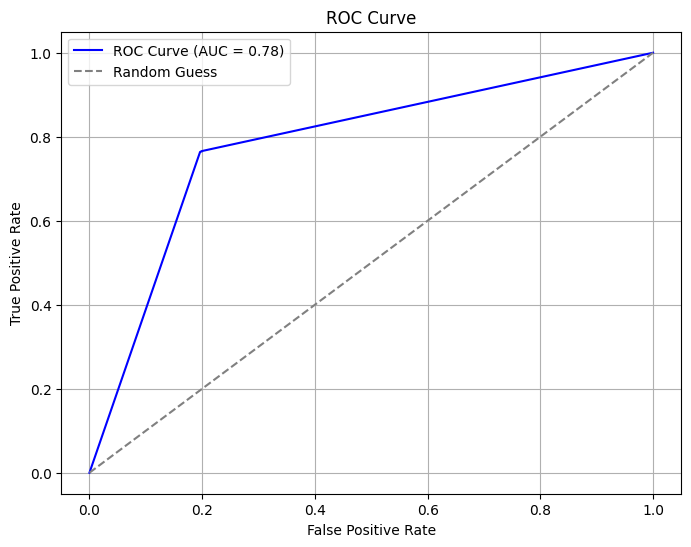

In [120]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

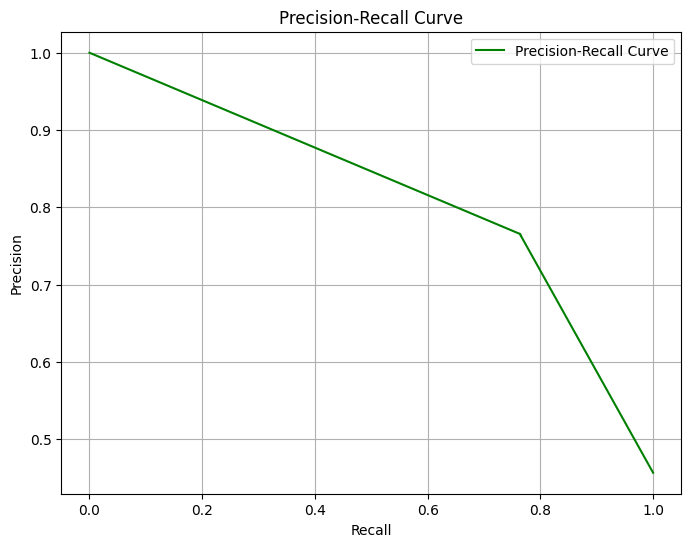

In [121]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall Curve", color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

The Decision Tree Classifier model has an accuracy score of 0.78%.

#### Random Forest Classfier

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


model2_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state = 42))
])

param_grid = {
    "classifier__n_estimators": [50, 100, 150, 200, 250],  # Prefix with 'classifier__' to target pipeline step
    "classifier__max_depth": [None, 10, 20, 30], 
    "classifier__min_samples_split": [2, 5, 10]  # Control splits for better generalization
}


grid_search = GridSearchCV(
    estimator=model2_pipeline, 
    param_grid=param_grid,
    cv=5, 
    scoring="accuracy", 
    n_jobs=-1, 
    verbose=1
)


grid_search.fit(water_train, train_labels)


print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Use the best pipeline for predictions
best_model = grid_search.best_estimator_
y_pred_rf = best_model.predict(water_test)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 250}
Best cross-validation accuracy: 0.8243


GridSearch CV is used to find the best estimators, depth, and min split for the Random Forest Classifier

In [122]:
y_proba_rf = best_model.predict_proba(water_test)[:, 1]

accuracy_rf = accuracy_score(water_test_binary_labels, y_pred_rf) 
print(f"Final Test Accuracy: {accuracy_rf:.4f}")

fpr_rf, tpr_rf, _ = roc_curve(water_test_binary_labels, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Precision-Recall Curve for random forest
precision_rf, recall_rf, _ = precision_recall_curve(water_test_binary_labels, y_proba_rf)


# Display Classification Report
print("\nClassification Report:")
print(classification_report(water_test_binary_labels, y_pred_rf))

Final Test Accuracy: 0.8277

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      6457
           1       0.83      0.78      0.81      5423

    accuracy                           0.83     11880
   macro avg       0.83      0.82      0.83     11880
weighted avg       0.83      0.83      0.83     11880



C:\Users\maini\AppData\Local\Temp\ipykernel_24028\2002165414.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], "k--", color="gray", label="Random Guess")


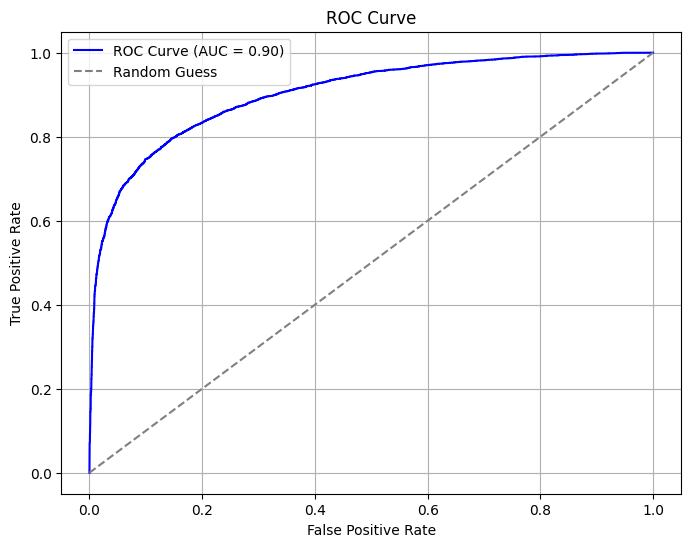

In [123]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"ROC Curve (AUC = {roc_auc_rf:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

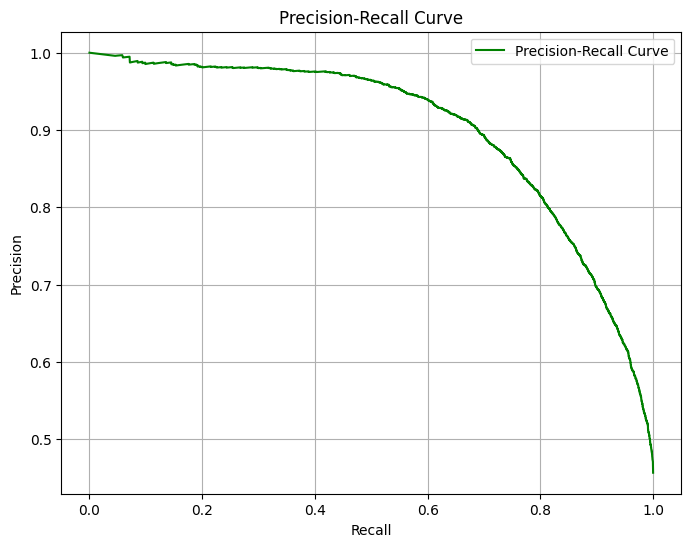

In [124]:
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label="Precision-Recall Curve", color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

#### Comparing the Decision Tree Classifier model to the Random Forest Classifier model!

C:\Users\maini\AppData\Local\Temp\ipykernel_24028\3697644119.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], "k--", color="gray", label="Random Guess")


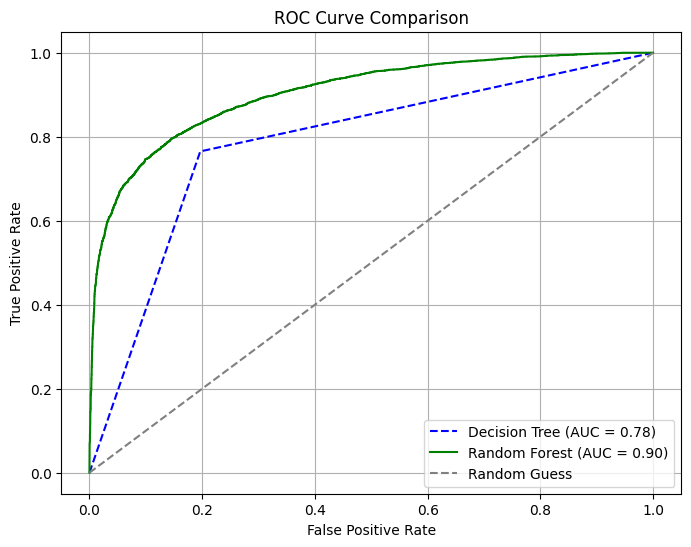

In [125]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.2f})", linestyle="--", color="blue")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color="green")
plt.plot([0, 1], [0, 1], "k--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

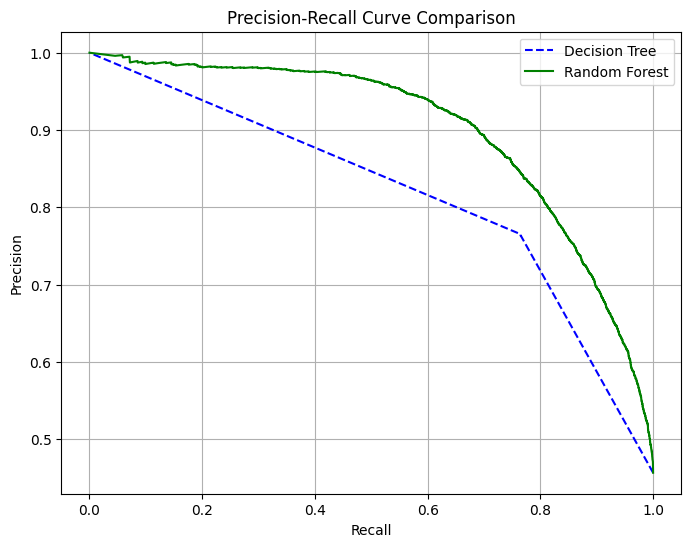

In [126]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Decision Tree", linestyle="--", color="blue")
plt.plot(recall_rf, precision_rf, label="Random Forest", color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.grid()
plt.show()

### Random forest has a AUC of 0.90 higher than that 0.78 AUC for the Decision Tree. 

### Random forest has an accuracy of 82.78 while Decision Tree's accuracy is 78.55.

#### Random Forest Classfier performs better than Decision Tree Classifier since it has a higher Accuracy, better ROC and Precision curve than Decision Tree Classifier.

In [130]:
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('zero_imputer',
                                                                   FunctionTransformer(func=<function zero_imputer at 0x000002170A0DD310>)),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population', 'longitude',
                                                   'latitude', 'region_code',
                                                   'district_code']),
                                                 ('ca

In [131]:
model2_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('zero_imputer',
                                                                   FunctionTransformer(func=<function zero_imputer at 0x0000021707614A60>)),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population', 'longitude',
                                                   'latitude', 'region_code',
                                                   'district_code']),
                                                 ('ca

Pipeline steps!